Lecture 7: Confidence Intervals

In [2]:
import random, pylab, numpy

In [3]:
#set line width
pylab.rcParams['lines.linewidth'] = 4
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
pylab.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
pylab.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
pylab.rcParams['ytick.major.size'] = 7
#set size of markers, e.g., circles representing points
#set numpoints for legend
pylab.rcParams['legend.numpoints'] = 1

In [4]:
class FairRoulette():
    def __init__(self):
        self.pockets = []
        for i in range(1,37):
            self.pockets.append(i)
        self.ball = None
        self.pocketOdds = len(self.pockets) - 1
    def spin(self):
        self.ball = random.choice(self.pockets)
    def betPocket(self, pocket, amt):
        if str(pocket) == str(self.ball):
            return amt*self.pocketOdds
        else: return -amt
    def __str__(self):
        return 'Fair Roulette'

In [5]:
def playRoulette(game, numSpins, pocket, bet, toPrint):
    totPocket = 0
    for i in range(numSpins):
        game.spin()
        totPocket += game.betPocket(pocket, bet)
    if toPrint:
        print(numSpins, 'spins of', game)
        print('Expected return betting', pocket, '=',\
              str(100*totPocket/numSpins) + '%\n')
    return (totPocket/numSpins)

In [6]:
def findPocketReturn(game, numTrials, trialSize, toPrint):
    pocketReturns = []
    for t in range(numTrials):
        trialVals = playRoulette(game, trialSize, 2, 1, toPrint)
        pocketReturns.append(trialVals)
    return pocketReturns

In [7]:
def getMeanAndStd(X):
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    std = (tot/len(X))**0.5
    return mean, std

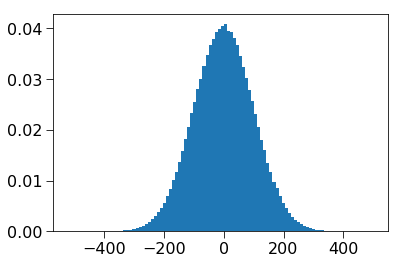

In [8]:
random.seed(1)
dist, numSamples = [], 1000000

for i in range(numSamples):
    dist.append(random.gauss(0, 100))
    
weights = [1/numSamples]*len(dist)
v = pylab.hist(dist, bins = 100,
              weights = [1/numSamples]*len(dist))

In [9]:
print('Fraction within ~200 of mean =',
      sum(v[0][30:70]))

Fraction within ~200 of mean = 0.9571469999999963


In [10]:
def gaussian(x, mu, sigma):
  factor1 = (1.0/(sigma*((2*pylab.pi)**0.5)))
  factor2 = pylab.e**-(((x-mu)**2)/(2*sigma**2))
  return factor1*factor2

Text(0.5,1,'Normal Distribution, mu = 0, sigma = 1')

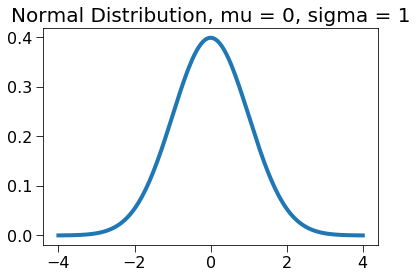

In [11]:
xVals, yVals = [], []
mu, sigma = 0, 1
x = -4
while x <= 4:
    xVals.append(x)
    yVals.append(gaussian(x, mu, sigma))
    x += 0.05
pylab.plot(xVals, yVals)
pylab.title('Normal Distribution, mu = ' + str(mu)\
            + ', sigma = ' + str(sigma))

In [12]:
import scipy.integrate

def checkEmpirical(numTrials):
  for t in range(numTrials):
     mu = random.randint(-10, 10)
     sigma = random.randint(1, 10)
     print('For mu =', mu, 'and sigma =', sigma)
     for numStd in (1, 1.96, 3):
        area = scipy.integrate.quad(gaussian,
                                    mu-numStd*sigma,
                                    mu+numStd*sigma,
                                    (mu, sigma))[0]
        print(' Fraction within', numStd,
              'std =', round(area, 4))

In [13]:
checkEmpirical(3)

For mu = 4 and sigma = 10
 Fraction within 1 std = 0.6827
 Fraction within 1.96 std = 0.95
 Fraction within 3 std = 0.9973
For mu = -7 and sigma = 6
 Fraction within 1 std = 0.6827
 Fraction within 1.96 std = 0.95
 Fraction within 3 std = 0.9973
For mu = -2 and sigma = 9
 Fraction within 1 std = 0.6827
 Fraction within 1.96 std = 0.95
 Fraction within 3 std = 0.9973


Mean of rolling 1 die = 2.498756875768418, Std = 1.4433018399078341
Mean of rolling 50 dice = 2.499870295810377, Std = 0.2029638516487054


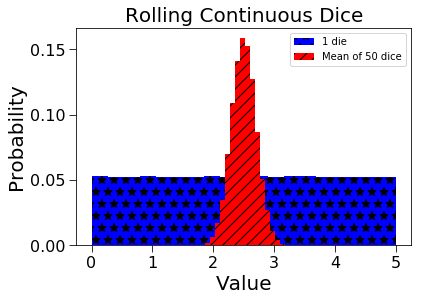

In [14]:
#Test CLT
def plotMeans(numDice, numRolls, numBins, legend, color, style):
    means = []
    for i in range(numRolls//numDice):
        vals = 0
        for j in range(numDice):
            vals += 5*random.random() 
        means.append(vals/float(numDice))
    pylab.hist(means, numBins, color = color, label = legend,
               weights = [1/len(means)]*len(means),
               hatch = style)
    return getMeanAndStd(means)
 
mean, std = plotMeans(1, 1000000, 19, '1 die', 'b', '*')
print('Mean of rolling 1 die =', str(mean) + ',', 'Std =', std)
mean, std = plotMeans(50, 1000000, 19, 'Mean of 50 dice', 'r', '//')
print('Mean of rolling 50 dice =', str(mean) + ',', 'Std =', std)
pylab.title('Rolling Continuous Dice')
pylab.xlabel('Value')
pylab.ylabel('Probability')
pylab.legend()

Text(0.5,1,'Expected Return Betting a Pocket 200 Times')

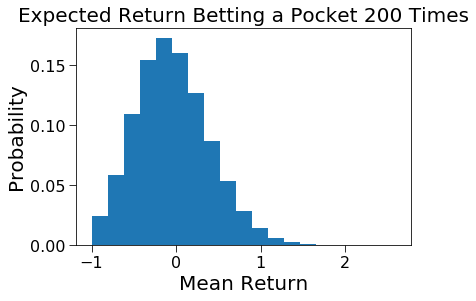

In [15]:
# Test CLT
numTrials = 1000000
numSpins = 200
game = FairRoulette()

means = []
for i in range(numTrials):
    means.append(findPocketReturn(game, 1, numSpins,
                                  False)[0])

pylab.hist(means, bins = 19,
           weights = [1/len(means)]*len(means))
pylab.xlabel('Mean Return')
pylab.ylabel('Probability')
pylab.title('Expected Return Betting a Pocket 200 Times')

In [16]:
def throwNeedles(numNeedles):
    inCircle = 0
    for Needles in range(1, numNeedles + 1, 1):
        x = random.random()
        y = random.random()
        if (x*x + y*y)**0.5 <= 1.0:
            inCircle += 1
    return 2*(inCircle/float(numNeedles))
    
def getEst(numNeedles, numTrials):
    estimates = []
    for t in range(numTrials):
        piGuess = throwNeedles(numNeedles)
        estimates.append(piGuess)
    sDev = numpy.std(estimates)
    curEst = sum(estimates)/len(estimates)
    print('Est. = ' + str(curEst) +\
          ', Std. dev. = ' + str(round(sDev, 6))\
          + ', Needles = ' + str(numNeedles))
    return (curEst, sDev)

def estPi(precision, numTrials):
    numNeedles = 1000
    sDev = precision
    while sDev >= precision/2:
        curEst, sDev = getEst(numNeedles,
                              numTrials)
        numNeedles *= 2
    return curEst

In [17]:
random.seed(0)
estPi(0.005, 100)

Est. = 1.5742200000000006, Std. dev. = 0.023943, Needles = 1000
Est. = 1.5695899999999994, Std. dev. = 0.017748, Needles = 2000
Est. = 1.5705399999999998, Std. dev. = 0.013565, Needles = 4000
Est. = 1.5707175, Std. dev. = 0.008402, Needles = 8000
Est. = 1.5706775, Std. dev. = 0.00685, Needles = 16000
Est. = 1.5706568750000003, Std. dev. = 0.004238, Needles = 32000
Est. = 1.5705859374999995, Std. dev. = 0.003514, Needles = 64000
Est. = 1.5707948437499997, Std. dev. = 0.002017, Needles = 128000


1.5707948437499997